
## Resolución de problemas mediante busqueda 
### Problema del Viajante
https://es.wikipedia.org/wiki/Problema_del_viajante


Dada una lista de ciudades y las distancias entre ellas, las capitales de los estados de EEUU, por ejemplo, ¿cual es la ruta mas corta que visita cada ciudad y regresa a la ciudad original?

Cuaderno adaptado de:
https://colab.research.google.com/github/Albina1810/tsp/blob/master/TSP.ipynb

Por Prof. Hector Barrio Crespo

Universidad Europea, 2021

#Descripción
En este ejemplo se utiliza una lista de ciudad peruanas con sus respectivas coordenadas. Como resultado se busca obtener la ruta más corta para visitar cada una de las ciudades en unas  vacaciones por ejemplo.


# Intercambio par a par
El intercambio par a par o técnica 2-opt involucra en cada iteración la eliminación de dos aristas y el reemplazo de estas con dos aristas diferentes que reconecten los fragmentos creados por la eliminación de las aristas produciendo un camino nuevo más corto. Esto es un caso especial del método k-opt. Note que, la etiqueta Lin–Kernighan es un nombre erróneo para el 2-opt muchas veces utilizado. Lin–Kernighan es realmente el método más general de k-opt (https://en.wikipedia.org/wiki/2-opt).

In [ ]:
import numpy as np
import pandas as pd
from math import radians, cos, sin
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Calculamos la distancia euclidiana en espacio de la ruta r por la ciudad c,
# terminando al inicio:
distancia_ruta = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) 
                                    for p in range(len(r))])

# Invertir el orden de los elementos desde i a k en r:
inversion = lambda r,i,k: np.concatenate((r[0:i], 
                                          r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(ciudades, umbral_mejora):
    # Array de filas con las ciudades:
    ruta = np.arange(ciudades.shape[0])
    # Inicializar el factor de mejora:
    f_mejora = 1
    # Calcular la distancia de la primera ruta:
    mejor_dist = distancia_ruta(ruta, ciudades)
    
    # Si la ruta mejora seguimos optimizando:
    while f_mejora > umbral_mejora:
        # Guardamos la mejor distancia obtenida:
        dist_a_mejorar = mejor_dist 
        
        # Para cada ciudad, excluyendo la primera y la ultima:
        for cambiar_primera in range(1,len(ruta)-2):
            # Para cada ciudad subsiguiente:
            for cambiar_ultima in range(cambiar_primera+1, len(ruta)):
                # Invertimos el orden de las ciudades:
                nueva_ruta = inversion(ruta,cambiar_primera, cambiar_ultima)
                # Comprobamos la distancia con este cambio:
                nueva_distancia = distancia_ruta(nueva_ruta, ciudades)

                # Si ha mejorado la distancia:                
                if nueva_distancia < mejor_dist: 
                    # Esta es nuestra nueva mejor ruta:
                    ruta = nueva_ruta
                    # Esta es nuestra mejor distancia:
                    mejor_dist = nueva_distancia
        # Calculamos cuanto ha mejorado la ruta:
        f_mejora = 1 - mejor_dist/dist_a_mejorar
        # Si la ruta no mejora de manera sustancial, devolvemos la ruta:
    return ruta

# **Importar csv con Longitud y Latitud de las ciudades**

https://github.com/Albina1810/tsp/blob/master/cities50.csv


In [ ]:
!wget https://raw.githubusercontent.com/ItaloOre/Inteligencia-Artificial/main/Unidad%201/ciudadesDelPeru.csv

--2021-10-27 02:57:45--  https://raw.githubusercontent.com/ItaloOre/Inteligencia-Artificial/main/Unidad%201/ciudadesDelPeru.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1612 (1.6K) [text/plain]
Saving to: ‘ciudadesDelPeru.csv.3’

ciudadesDelPeru.csv 100%[===================>]   1.57K  --.-KB/s    in 0s      

2021-10-27 02:57:45 (34.2 MB/s) - ‘ciudadesDelPeru.csv.3’ saved [1612/1612]



In [ ]:
ciudades= pd.read_csv("ciudadesDelPeru.csv")
ciudades.head(6)

,name,description,latitude,longitude
0,Lima,Capital del Perú,-12.04318,-77.02824
1,Arequipa,Capital de la época colonial de la región de A...,-16.39889,-71.53500
2,Callao,Ciudad portuaria ubicada en la provincia const...,-12.05659,-77.11814
3,Trujillo,Ciudad del noroeste de Perú,-8.11599,-79.02998
4,Chiclayo,Ciudad capital de la región de Lambayeque,-6.77137,-79.84088
5,Iquitos,Ciudad puerto peruana y una vía de acceso a lo...,-3.74912,-73.25383


# **Convertidor de Latitud y Longitud a Coordenadas Cartesianas**

** R de la tierra =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 
 http://www.geomidpoint.com/example.html
 
 
 


In [ ]:
lat =ciudades["latitude"].map(radians)
lon = ciudades["longitude"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y = lon.map(cos)*lat.map(sin)*6371

ciudades["lat_radians"] = lat
ciudades["lon_radians"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head()

,name,description,latitude,longitude,lat_radians,lon_radians,x,y
0,Lima,Capital del Perú,-12.04318,-77.02824,-0.210193,-1.344396,1398.627662,-298.389338
1,Arequipa,Capital de la época colonial de la región de A...,-16.39889,-71.53500,-0.286215,-1.248521,1935.769342,-569.687150
2,Callao,Ciudad portuaria ubicada en la provincia const...,-12.05659,-77.11814,-0.210427,-1.345965,1389.029622,-296.681565
3,Trujillo,Ciudad del noroeste de Perú,-8.11599,-79.02998,-0.141651,-1.379333,1200.228814,-171.159612
4,Chiclayo,Ciudad capital de la región de Lambayeque,-6.77137,-79.84088,-0.118183,-1.393486,1115.894244,-132.496839


In [ ]:
ciudades_d = ciudades.drop(["name", "description","latitude", "longitude", "lat_radians", "lon_radians"], 1)
ciudades_d.head(6)

,x,y
0,1398.627662,-298.389338
1,1935.769342,-569.687150
2,1389.029622,-296.681565
3,1200.228814,-171.159612
4,1115.894244,-132.496839
5,1831.762102,-120.031777


In [ ]:
lat =ciudades["latitude"].map(radians)
lon = ciudades["longitude"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y = lon.map(cos)*lat.map(sin)*6371

ciudades["lat_radians"] = lat
ciudades["lon_radians"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head()

,name,description,latitude,longitude,lat_radians,lon_radians,x,y
0,Lima,Capital del Perú,-12.04318,-77.02824,-0.210193,-1.344396,1398.627662,-298.389338
1,Arequipa,Capital de la época colonial de la región de A...,-16.39889,-71.53500,-0.286215,-1.248521,1935.769342,-569.687150
2,Callao,Ciudad portuaria ubicada en la provincia const...,-12.05659,-77.11814,-0.210427,-1.345965,1389.029622,-296.681565
3,Trujillo,Ciudad del noroeste de Perú,-8.11599,-79.02998,-0.141651,-1.379333,1200.228814,-171.159612
4,Chiclayo,Ciudad capital de la región de Lambayeque,-6.77137,-79.84088,-0.118183,-1.393486,1115.894244,-132.496839


In [ ]:
df = ciudades_d.copy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=['x1', 'x2'])

In [ ]:
df_escalado.head()

,x1,x2
0,31.414672,63.596867
1,76.871872,16.621156
2,30.602409,63.892571
3,14.624583,85.626926
4,7.487521,92.321455


In [ ]:
ciudades_d = np.asarray(ciudades_d)

In [ ]:
escalado = np.asarray(df_escalado)
escalado

array([[ 31.41467171,  63.59686671],
       [ 76.87187242,  16.62115636],
       [ 30.60240918,  63.89257076],
       [ 14.6245833 ,  85.62692567],
       [  7.4875213 ,  92.32145519],
       [ 68.06995262,  94.47980348],
       [ 47.69345787,  56.38066046],
       [  0.44615757,  99.00767395],
       [ 18.48193255,  80.76856576],
       [ 55.11578106,  72.44944716],
       [ 86.28239808,   0.        ],
       [ 41.97773632,  49.16245045],
       [ 89.61352955,  15.0795127 ],
       [  0.        , 100.        ],
       [ 75.32803438,  35.41302515],
       [ 39.35341215,  70.02006159],
       [ 55.79627805,  46.98297384],
       [ 19.70224325,  87.83721355],
       [ 27.88678203,  75.82808932],
       [ 46.63422693,  64.22515298],
       [ 39.38630174,  85.86870319],
       [100.        ,  29.81087395]])

# Busqueda de Rutas

In [ ]:
escalado = np.asarray(df_escalado)
escalado

array([[ 31.41467171,  63.59686671],
       [ 76.87187242,  16.62115636],
       [ 30.60240918,  63.89257076],
       [ 14.6245833 ,  85.62692567],
       [  7.4875213 ,  92.32145519],
       [ 68.06995262,  94.47980348],
       [ 47.69345787,  56.38066046],
       [  0.44615757,  99.00767395],
       [ 18.48193255,  80.76856576],
       [ 55.11578106,  72.44944716],
       [ 86.28239808,   0.        ],
       [ 41.97773632,  49.16245045],
       [ 89.61352955,  15.0795127 ],
       [  0.        , 100.        ],
       [ 75.32803438,  35.41302515],
       [ 39.35341215,  70.02006159],
       [ 55.79627805,  46.98297384],
       [ 19.70224325,  87.83721355],
       [ 27.88678203,  75.82808932],
       [ 46.63422693,  64.22515298],
       [ 39.38630174,  85.86870319],
       [100.        ,  29.81087395]])

In [ ]:
#  Encontramos una buena ruta (la ruda da el orden de viaje por numero de fila)
ruta = two_opt(escalado, 0.001)
ruta

array([ 0, 11,  1, 10, 12, 21, 14, 16,  6, 19,  9,  5, 20, 17, 13,  7,  4,
        3,  8, 18, 15,  2])

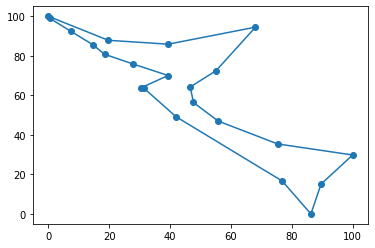

Ruta: [ 0 11  1 10 12 21 14 16  6 19  9  5 20 17 13  7  4  3  8 18 15  2]

Distancia Escalada: 358.5606282636426


In [ ]:
# Diagrama Cartesiano
# Reordenamos la matriz por ruta:
nuevo_orden = np.concatenate((np.array([escalado[ruta[i]] 
                                        for i in range(len(ruta))]),
                              np.array([escalado[0]])))
# Mostramos las Ciudades.
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la Ruta.
plt.plot(nuevo_orden[:,0],nuevo_orden[:,1])
plt.show()
# Imprimimos la ruta y la distancia:
print("Ruta: " + str(ruta) + "\n\nDistancia Escalada: " 
      + str(distancia_ruta(ruta, escalado)))


In [ ]:
#unidades de la escala = ()Max (Lng o Lat) - Min(Lng o Lat)) /100
#unidad de escala = 53.31km
Dist_km = distancia_ruta(ruta, escalado) * 53.31
Dist_km

19114.86709273479

In [ ]:
orden = pd.DataFrame(ruta, columns=["index"])
ciudades["index"] = ciudades.index
viaje = orden.merge(ciudades, on = "index")
viaje

,index,name,description,latitude,longitude,lat_radians,lon_radians,x,y
0,0,Lima,Capital del Perú,-12.04318,-77.02824,-0.210193,-1.344396,1398.627662,-298.389338
1,11,Ica,Ciudad del eterno sol,-14.06777,-75.72861,-0.245529,-1.321714,1523.445341,-381.752113
2,1,Arequipa,Capital de la época colonial de la región de A...,-16.39889,-71.53500,-0.286215,-1.248521,1935.769342,-569.687150
3,10,Tacna,Ciudad del sur de Perú cerca de la frontera co...,-18.01465,-70.25362,-0.314415,-1.226157,2046.968129,-665.678957
4,12,Juliaca,Ciudad de la provincia de San Román,-15.50000,-70.13333,-0.270526,-1.224058,2086.330200,-578.590571
5,21,Puerto maldonado,Capital de la región de Madre de Dios,-12.59331,-69.18913,-0.219795,-1.207578,2209.061166,-493.512857
6,14,Cusco,Ciudad de los Andes peruanos,-13.52264,-71.96734,-0.236015,-1.256067,1917.526693,-461.158873
7,16,Ayacucho,Ciudad de la zona sur central de Perú,-13.15878,-74.22321,-0.229664,-1.295439,1686.731126,-394.339197
8,6,Huancayo,Ciudad capital de la región de Junín en el cen...,-12.06513,-75.20486,-0.210576,-1.312572,1590.984746,-340.064939
9,19,Oxapampa,Ciudad ubicada en el departamento de Pasco,-10.57750,-75.40167,-0.184612,-1.316007,1578.468421,-294.760810


In [ ]:
inicio = viaje[0:1]
ciclo = viaje.append(inicio)
ciclo

,index,name,description,latitude,longitude,lat_radians,lon_radians,x,y
0,0,Lima,Capital del Perú,-12.04318,-77.02824,-0.210193,-1.344396,1398.627662,-298.389338
1,11,Ica,Ciudad del eterno sol,-14.06777,-75.72861,-0.245529,-1.321714,1523.445341,-381.752113
2,1,Arequipa,Capital de la época colonial de la región de A...,-16.39889,-71.53500,-0.286215,-1.248521,1935.769342,-569.687150
3,10,Tacna,Ciudad del sur de Perú cerca de la frontera co...,-18.01465,-70.25362,-0.314415,-1.226157,2046.968129,-665.678957
4,12,Juliaca,Ciudad de la provincia de San Román,-15.50000,-70.13333,-0.270526,-1.224058,2086.330200,-578.590571
5,21,Puerto maldonado,Capital de la región de Madre de Dios,-12.59331,-69.18913,-0.219795,-1.207578,2209.061166,-493.512857
6,14,Cusco,Ciudad de los Andes peruanos,-13.52264,-71.96734,-0.236015,-1.256067,1917.526693,-461.158873
7,16,Ayacucho,Ciudad de la zona sur central de Perú,-13.15878,-74.22321,-0.229664,-1.295439,1686.731126,-394.339197
8,6,Huancayo,Ciudad capital de la región de Junín en el cen...,-12.06513,-75.20486,-0.210576,-1.312572,1590.984746,-340.064939
9,19,Oxapampa,Ciudad ubicada en el departamento de Pasco,-10.57750,-75.40167,-0.184612,-1.316007,1578.468421,-294.760810


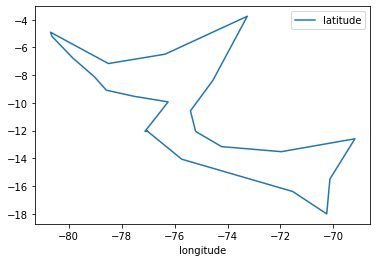

In [ ]:
# Dibujar Latitud y Longitud
ciclo.plot(kind="line", x="longitude", y="latitude");

# Representacion de las Rutas

In [ ]:
# Escribimos la Ruta a un CSV.
viajante = ciclo[["latitude", "longitude"]]
viajante.to_csv('viajante.csv', index=False)
files.download("viajante.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se puede visualizar el archivo aqui: https://raw.githubusercontent.com/ItaloOre/Inteligencia-Artificial/main/Unidad%201/Mejor%20ruta.PNG


![alt text](https://raw.githubusercontent.com/ItaloOre/Inteligencia-Artificial/main/Unidad%201/Mejor%20ruta.PNG
)

¿Puedes modificar el problema para obtener el viaje entre las principales ciudades de tu pais?

El objetivo es familizarirse con Colab y con el algoritmo de busqueda 2-Opt. 
Envia el enlace a tu cuaderno mediante Canvas o a hector.barrio@universidadeuropea.es.
